<a href="https://colab.research.google.com/github/TonyChen91/KerasTensorflow/blob/main/keras_mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
import numpy as np #維度陣列和矩陣運算
import pandas as pd
from keras.utils import np_utils
np.random.seed(10) #之後的random值都會固定，偽隨機

In [ ]:
from keras.datasets import mnist
(x_train_image, y_train_label),(x_test_image, y_test_label)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_Train4D=x_train_image.reshape(x_train_image.shape[0],28,28,1).astype("float32")
x_Test4D=x_test_image.reshape(x_test_image.shape[0],28,28,1).astype("float32")

x_Train4D_normalize=x_Train4D/255
x_Test4D_normalize=x_Test4D/255

y_Train= np_utils.to_categorical(y_train_label)
y_Test= np_utils.to_categorical(y_test_label)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
model=Sequential() #建立一個線性堆疊模型
model.add(Conv2D(filters=16,kernel_size=(5,5),padding="same",input_shape=(28,28,1),activation="relu"))
#filter代表濾鏡後一張圖產生16張
#kernel_size代表濾鏡大小5*5 不是MLP的initializer
#input_shape代表輸入的圖片的維度是28*28px,1代表色彩值只有一個(黑白色階)
model.add(MaxPooling2D(pool_size=(2,2)))
#池化層將16個28*28縮小成16個14*14
model.add(Conv2D(filters=36,kernel_size=(5,5),padding="same",activation="relu"))
#將16組濾鏡圖在擴增成一共36組濾鏡圖
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
#平坦層將36*7*7的圖片組轉換成36*36*7=1764的float並對應1764的神經元進入隱藏層
model.add(Dense(units=128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=10,activation="softmax"))

print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 7, 7, 36)          0         
                                                                 
 flatten_3 (Flatten)         (None, 1764)             

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"]) #定義此模型的訓練方式
train_history=model.fit(x=x_Train4D_normalize,y=y_Train,validation_split=0.2,epochs=10,batch_size=300,verbose=2)#訓練
#validation_split=0.2會將傳入的資料(x.y)分成80%拿去訓練20%拿去驗證
#batch_size=200代表每一批次有200資料
#epochs=10代表執行10次訓練週期
#verbose=2代表顯示訓練過程
#因此傳入60000資料有48000拿去訓練,每一批次200資料因此同時跑240批次一次epoch

Epoch 1/10
160/160 - 44s - loss: 0.5036 - accuracy: 0.8402 - val_loss: 0.0995 - val_accuracy: 0.9694 - 44s/epoch - 275ms/step
Epoch 2/10
160/160 - 39s - loss: 0.1434 - accuracy: 0.9582 - val_loss: 0.0676 - val_accuracy: 0.9785 - 39s/epoch - 243ms/step
Epoch 3/10
160/160 - 39s - loss: 0.1036 - accuracy: 0.9684 - val_loss: 0.0557 - val_accuracy: 0.9834 - 39s/epoch - 241ms/step
Epoch 4/10
160/160 - 40s - loss: 0.0859 - accuracy: 0.9743 - val_loss: 0.0487 - val_accuracy: 0.9854 - 40s/epoch - 252ms/step
Epoch 5/10
160/160 - 44s - loss: 0.0722 - accuracy: 0.9779 - val_loss: 0.0452 - val_accuracy: 0.9863 - 44s/epoch - 275ms/step
Epoch 6/10
160/160 - 42s - loss: 0.0646 - accuracy: 0.9805 - val_loss: 0.0403 - val_accuracy: 0.9878 - 42s/epoch - 260ms/step
Epoch 7/10
160/160 - 39s - loss: 0.0557 - accuracy: 0.9826 - val_loss: 0.0400 - val_accuracy: 0.9881 - 39s/epoch - 241ms/step
Epoch 8/10
160/160 - 43s - loss: 0.0535 - accuracy: 0.9834 - val_loss: 0.0341 - val_accuracy: 0.9901 - 43s/epoch - 271

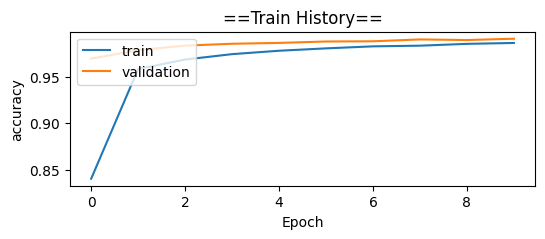

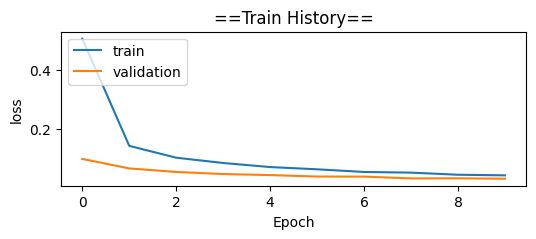

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
  plt.figure(figsize=(6,2))
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title("==Train History==")
  plt.ylabel(train)
  plt.xlabel("Epoch")
  plt.legend(["train","validation"],loc="upper left")
  plt.show()
show_train_history(train_history,"accuracy","val_accuracy")
#可見不論是訓練(80%)還是驗證(20%)準確率都愈來愈高
#train的acc的準確率通常會比val來的高 就像老師上課講過的題目拿來在考一次一樣
#如果發現acc愈來愈高 但val_acc沒有一起變高則稱為overfitting過擬和
show_train_history(train_history,"loss","val_loss")

In [ ]:
scores=model.evaluate(x_Test4D_normalize,y_Test) #快速評估模型對test_data的預測能力
print(scores)

313/313 [==============================] - 3s 9ms/step - loss: 0.0265 - accuracy: 0.9912
[0.026466326788067818, 0.9911999702453613]


In [ ]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
  fig=plt.gcf()
  fig.set_size_inches(6,7)#整個大圖的尺寸
  if num>25: #num=畫幾個小圖最多12
    num=12
  for i in range(0, num):
    ax=plt.subplot(5,5,1+i) #子圖形五行五列 第幾個 如果寫num-i會倒過來
    ax.imshow(images[idx],cmap="binary")
    title="label="+str(labels[idx])
    if len(prediction)>0: #如果有預測值放上去顯示
      title+=",pred="+str(prediction[idx])
    ax.set_title(title,fontsize=8)
    ax.set_xticks([]) #不顯示刻度
    ax.set_yticks([])
    idx+=1
  plt.show()
# plot_images_labels_prediction(x_train_image,y_train_label,[],0,10)
# print("")
# plot_images_labels_prediction(x_test_image,y_test_label,[],0,5)

313/313 [==============================] - 3s 9ms/step
[1.9073394e-07 2.6583180e-04 4.8400022e-07 1.7770150e-01 2.3631055e-06
 8.2165325e-01 3.8578150e-05 7.2523804e-08 8.7010394e-06 3.2888405e-04]
[5 6 1 3 8 1 0 5 1 3]


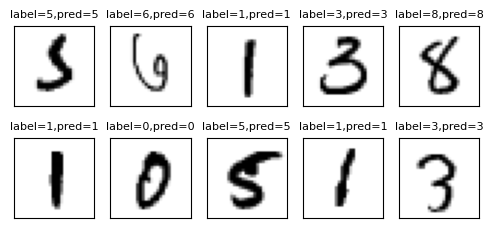

In [ ]:
prediction=model.predict(x_Test4D_normalize) #預測會返回包含预测概率的数组
print(prediction[340])
predicted_classes = np.argmax(prediction, axis=1) #每个预测概率数组中找到最大值的index
print(predicted_classes[340:350]) #340~349十個預測值
plot_images_labels_prediction(x_test_image,y_test_label,predicted_classes,idx=340)

In [ ]:
pd.crosstab(y_test_label,predicted_classes,rownames=["label"],colnames=["predict"]) #第一個參數是label,第二個是預測
#crosstab會去對前兩個參數(a,b)並塞到對應的表格上

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,1,1,1,0
1,0,1131,2,1,0,0,0,1,0,0
2,1,0,1028,0,0,0,0,3,0,0
3,0,0,1,1002,0,2,0,3,2,0
4,0,0,0,0,977,0,1,0,1,3
5,1,0,0,5,0,881,3,0,0,2
6,5,2,0,0,1,3,946,0,1,0
7,0,1,3,1,0,0,0,1021,1,1
8,4,0,2,4,0,3,0,2,956,3


In [ ]:
df=pd.DataFrame({"label":y_test_label,"predict":predicted_classes})
df[340:350].transpose() #第340~350資料的label值和predict值 #.transpose()可以讓它變成橫的

,340,341,342,343,344,345,346,347,348,349
label,5,6,1,3,8,1,0,5,1,3
predict,5,6,1,3,8,1,0,5,1,3


In [ ]:
df[(df.label==5)&(df.predict==3)].transpose() #尋找所有label=5但預測卻是3的值 #先前crosstab顯示應該要有九個

,1393,1737,2035,2597,5937
label,5,5,5,5,5
predict,3,3,3,3,3
